In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt #this is to see the image
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [38]:
#use Keras to load out dataset #keras.datasets.mnist.load_data()
#now we have test data and train data together 


#now we can split our data 
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()
#X_train is the images
#y_train will be what image represent maybe like number 
#now will divided into X_train and y_train 

In [39]:
print('Training samples: ', len(X_train)) #training samples 60000 means we have 60000 images to train
print('Test samples: ', len(X_test))  #we have 10000 images to test

print("shape of individual images: ", X_train[0].shape) #(28,28) means 28*28 px very small images



Training samples:  60000
Test samples:  10000
shape of individual images:  (28, 28)


In [40]:
X_train[0] 
#can look image in this way (px)
#each pixel value ranges from 0 to 255.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

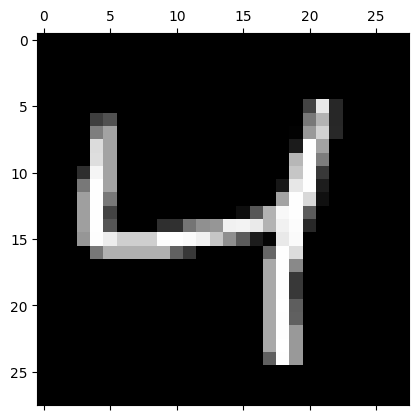

In [41]:
#look at another way see the image
plt.matshow(X_train[2], cmap='gray') 
#[0] is the first picture  we can change the number
# X_test will be other picture we don't want to touch is for test
#so we use y_train to see the number of X_train 

In [42]:
y_train[2] #the number of 2 need to be same as X_train [2]

4

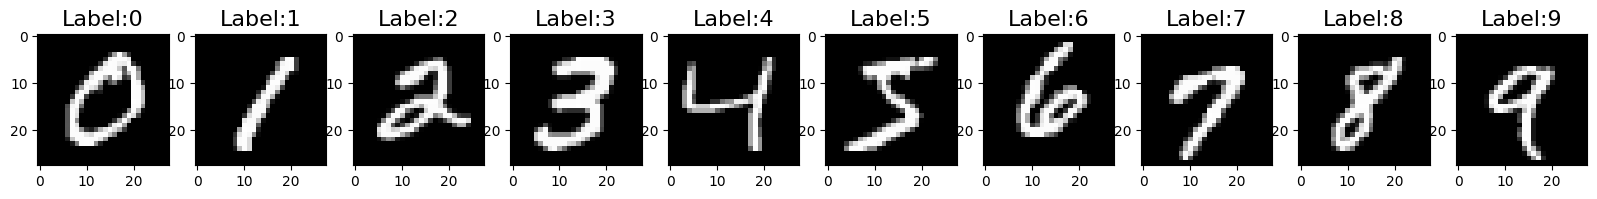

In [43]:
#look at image another way 
num_classes = 10 
_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
    sample = X_train[y_train ==i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label:{i}', fontsize=16)

In [44]:
#another way to look at image 
#check the shape

X_train.shape 

(60000, 28, 28)

## Scaling Pixel Values 缩放像素值 from (0 to 253) into (0 to 1)


on line [6], we saw the result have 0 to 253, we want to make it to 0 to 1

We scale the pixel values to the range [0,1] for several reasons.Neual networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme.It also helps in preventing the model from getting stuck in local minima during training.Furthermore,scaling ensures that all input features (pixel values in this case)contribute equally to the distance computations in the learning process,thus avoiding bias towards features with larger scales.

1.28 lab  Part 1 data transformation 数据转换 归一化

from line 18, we can see Right now, each pixel value ranges from 0 to 255.so we need to make it from 0 to 1

Why might it be helpful to scale pixel values to a different range?

Scaling pixel values (e.g., from 0–255 to 0–1) helps improve model training in several ways. It ensures that all input features are on a similar scale, which helps gradient-based optimization algorithms converge faster and more stably. Without scaling, large pixel values can dominate the learning process and cause numerical instability. It also helps activation functions work more effectively and often improves model generalization. 如果不进行缩放，较大的像素值可能会主导学习过程并导致数值不稳定。此外，缩放还有助于激活函数更有效地工作，并通常可以提高模型的泛化能力。


In [45]:
# 1. Scale pixel values from 0-255 to 0-1 range
# 将像素值从0-255范围缩放到0-1范围
X_train = X_train / 255.0
X_test = X_test / 255.0

How does viewing specific pixel values help you debug your preprocessing steps?
查看特定像素值如何帮助您调试预处理步骤？

Inspecting pixel values allows you to confirm that transformations are applied correctly. For example, if you scale to 0–1, you can check whether values originally at 255 become ~1.0. Looking at non-zero values also helps you understand data sparsity, detect anomalies (e.g., unexpected negative values), and ensure no data corruption occurred during preprocessing. 您可以检查原本值为 255 的像素是否变为接近 1.0。查看非零值还有助于您了解数据的稀疏性、检测异常情况（例如，意外的负值）并确保预处理过程中没有发生数据损坏。


In [46]:
# 2. Verify transformation by checking a few pixel values Print pixel values greater than zero
# 验证转换效果：查看部分像素值
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)


0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

In [47]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    


## Flatting Images from 2D to 1D Arrays

picture make it from 2D to 1D

In many machine learning models,including simple neural networks,the input data needs to be a flat vector of features.By converting the 2D image matrices into 1D arrays,we transform the data into a format that the neural network can work with.This is because the underlying algorithms
typically expect a single list of features for each input sample,and each pixel value in the image is treated as a separate feature.This step is essential

1.28 lab Part 2 Reshaping the Data 重塑数据 扁平化

from Line 17 we can see currently Each image is a 2D array — in this case, 28 by 28 pixels.

Why? because many machine learning algorithms expect input in a different format.

Reflect on how you might reshape or reorganize the data so that each image is represented as a single vector 一个向量 rather than a matrix 矩阵.

In [48]:
# 1. Check original shape
# 检查原始形状
print("Original training data shape:", X_train.shape)
print("Original test data shape:", X_test.shape)

Original training data shape: (60000, 28, 28)
Original test data shape: (10000, 28, 28)


Why do some models require flat vectors instead of 2D matrices? 为什么有些模型需要扁平向量而不是二维矩阵？

Many traditional machine learning models (e.g., logistic regression, fully connected neural networks) expect input as a 1D feature vector because they treat each pixel as an independent feature. Flattening simplifies the input structure and aligns with how these models process data—each pixel is a separate input node. Convolutional Neural Networks (CNNs) can keep 2D structure, but for non-CNN models, flattening is necessary.许多传统的机器学习模型（例如，逻辑回归、全连接神经网络）期望输入为一维特征向量，因为它们将每个像素视为一个独立的特征。扁平化简化了输入结构，使其与这些模型处理数据的方式相符——每个像素都是一个独立的输入节点。卷积神经网络 (CNN) 可以保持二维结构，但对于非 CNN 模型，扁平化是必要的。


In [49]:
# 2. Reshape 2D images to 1D vectors
# 将二维图像重塑为一维向量 将28×28的二维图像展平为784维的一维向量
X_train_flattened = X_train.reshape(len(X_train), 28*28)  # or len(X_train)can be :-1, -1表示自动计算样本数量 -1 means that the sample size is automatically calculated.
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [50]:
# 3. Check new shape
# 检查新形状
print("Shape of reshaped training data:", X_train_flattened.shape)
print("Shape of reshaped testing data:", X_test_flattened.shape)

#now the shape is becoming 784, not (28,28) 28*28=784

Shape of reshaped training data: (60000, 784)
Shape of reshaped testing data: (10000, 784)


How does reshaping the data affect the input size for your future model? 重塑数据会如何影响未来模型的输入尺寸？

Reshaping a 28×28 image into a flat vector changes the input dimension from (28, 28) to (784 pixel). This means the input layer of the model will need 784 neurons instead of 28×28 grid-like input. 将一张 28×28 的图像重塑为一个平面向量，会将输入维度从 (28, 28) 变为 (784)。这意味着模型的输入层需要 784 个神经元，而不是 28×28 的网格状输入。

It increases the number of parameters in fully connected layers and influences model complexity, training time, and memory usage. 这会增加全连接层的参数数量，并影响模型的复杂度、训练时间和内存使用量。

In [51]:
# 4. Verify one sample's shape
# 验证单个样本的形状
print("Shape after reshaping a single training sample:", X_train_flattened[0].shape)
print("The first 10 values after reshaping a single training sample:", X_train_flattened[0][:10])

Shape after reshaping a single training sample: (784,)
The first 10 values after reshaping a single training sample: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 1.29 class 
## Create an initial Neural Network 创建初始神经网络 using Keras


We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28X28 pixels in each image) and the outputlayer will have 10 neurons(10 numbers/pictures) as we want to predict a digit, 0-9


我们最初将使用一个简单的网络，它只包含一个输入层和一个输出层。输入层将有 784 个神经元(784 pixel)（每张图像 28x28 像素），输出层将有 10 个神经元，因为我们想要预测一个数字，0 到 9。


In [ ]:
from keras.layers import Dense  #2.2 lab add hidden layer need to import Dense 

#this is AI model
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') #2.2 lab try different activation functions 
    ]
)
#sequential is feed forward method
#since we don't have hidden layers, so 10 is the output, 
#784 is the neural, represent how many neural there  
#we don't have any hidden layers here, so only input layer and output


#softmax is the activation functions, more suitable when we have multiple classes, we have 10 class/output in this case,
#Softmax is typically used in the output layer for multi-class classification, where it takes a vector of scores and converts them into probabilities that sum to one, meaning the outputs compete with each other to represent how likely each class is. 
#Softplus,is a smooth version of ReLU and is usually used in hidden layers; it produces a single positive activation value and does not represent probabilities. So in short, softmax is about choosing between classes, while softplus is about smoothly activating individual neurons.


#2.2 lab ad hidden layer from here
model.add(Dense(64, activation = 'sigmoid'))
    #this time we choose 64 neural, 64 nodes节点,
model.add(Dense(32, activation = 'sigmoid'))
    #next one we choose 32 neural, 32 nodes,


model.compile(
    optimizer='adam',  #update the neural network,  #optimizer is a function whether the neural should be activated or not,
    loss='sparse_categorical_crossentropy', #loss is a function, how we measure, how good it is, how well is doing #when you have more than two outputs use sparse, two output use binary_crossentropy
    metrics = ["accuracy"] #metrics is what we want to measure, it should be a list
)

#now is to train our model, use fit function
model.fit(X_train_flattened, y_train, epochs = 10) #2.2 lab: adjust the number of epochs  
#epochs = 5 means we need to train our model 5 times


#now we have this model and we will test it

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7106 - loss: 1.1080
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8906 - loss: 0.3939
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9100 - loss: 0.3156
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9196 - loss: 0.2795
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9251 - loss: 0.2566
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9304 - loss: 0.2399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9339 - loss: 0.2275
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9357 - loss: 0.2172
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9388 - loss: 0.2079
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9408 - loss: 0.2010


1.29 lab 

# 1. Prediction Generation 预测生成 
How can you generate predictions from a trained neural network model using a test dataset?

what function or method would you use?

In [53]:
# This method takes the test dataset as input and returns the model's predictions.
# 使用训练好的神经网络模型生成预测
# 对于分类问题，predict 方法返回每个类别的概率
#now we test 6000 and predicted 10000 from line 3

y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# 2. Accessing Prediction Details 访问预测详情 
How would you access the prediction details for the second image in the test dataset?


Which index would you use to retrieve this information from the predictions array?

In [54]:
# now look at one of the pictures 
# To access the prediction details for the second image, we use index [1] (not [2]) because Python uses 0-based indexing.
#The predictions array contains probability distributions for each test image.

y_predicted[1]  # Python uses 0-based indexing

array([3.9038232e-01, 8.1105852e-01, 9.9955744e-01, 8.7568671e-01,
       1.3877789e-02, 1.8181226e-01, 4.2183559e-02, 5.5101049e-01,
       2.2134367e-01, 3.7298840e-02, 2.5288100e-06, 2.9603339e-06,
       2.8605550e-06, 7.3686911e-06, 1.1779954e-06, 7.1686291e-06,
       4.6398777e-06, 4.9209693e-06, 2.3436771e-06, 2.8701959e-06,
       3.8401313e-06, 4.2973625e-06, 7.0518395e-06, 5.1088591e-06,
       2.8289439e-06, 6.2293893e-06, 2.7514468e-06, 4.0172204e-06,
       2.7938538e-06, 2.7494875e-06, 4.6118421e-06, 2.9396783e-06],
      dtype=float32)

## 3. Finding the Predicted Class 确定预测类别 

How can you determine the predicted class from the output of a neural network?


What function would you use to find the index of the highest probability?

In [55]:
#We use `np.argmax()` function to find the index of the highest probability in the prediction array.
#Setting `axis=1` means we find the maximum value along each row (for each image).

np.argmax(y_predicted[1])

#2 means the 9.8837054e-01 from line28

2

## 4. Visualizing Test Data 可视化测试数据

Which function would you use to visualize a specific test image, 


and what parameters might you need to provide to display it in grayscale?

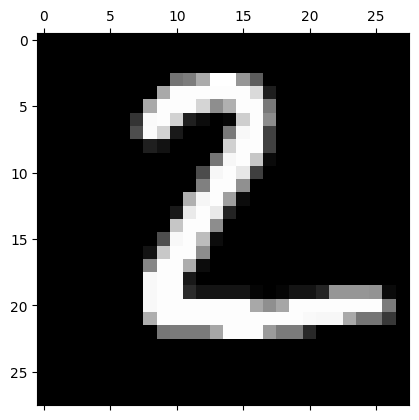

In [56]:
#We use `plt.matshow()` function to visualize an image.
#To display it in grayscale, we need to provide the parameter `cmap='gray'`.
#We also need to reshape the flattened image back to 28x28 if we're using flattened data.

plt.matshow(X_test[1], cmap='gray')

## 5. Comparing with Actual Labels 与实际标签比较

How would you retrieve the actual label for the second image in the test dataset?

Which index should you use to access this information?

In [57]:
#To retrieve the actual label for the second image, we access `y_test[1]`.
#This gives us the true class label (0-9) for that image.

y_test[1]

2

## 6. Converting Predictions to Class Labels 将预测转换为类别标签

How can you convert a list of prediction probabilities into class labels for each test image?

What Python technique or method would help you iterate over the predictions and extract the labels?


In [58]:

#we can use `np.argmax to get all labels at once.

y_predicted_labels = [np.argmax(i) for i in y_predicted]

## 7. Examining Initial Predictions 检查初始预测 

How would you access the first five predicted class labels from your converted predictions?

Which part of the list would you slice to get this subset?


In [59]:
#We use Python list/array slicing with `[:5]` to access the first five predicted class labels.
#The colon notation `[:5]` means "from the beginning up to (but not including) index 5".

#the first five predictions
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

## 8.Accuracy 

In [60]:
np.mean(y_predicted_labels == y_test)

0.9364

## 2月2日 check against the first 10 labels

In [61]:
print(y_predicted_labels[:10]) #this is what we predict the number 
print(','.join([str(c) for c in y_test[:10]])) #this is what we looking

#we find out index 8 number is 6 and 5 is different 

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7,2,1,0,4,1,4,9,5,9


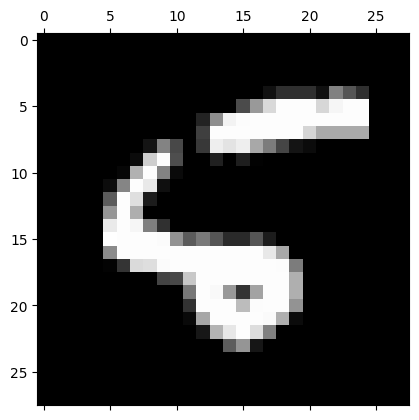

In [62]:
#lets check what the index 8 number is?
plt.matshow(X_test[8], cmap='gray')

## create a confusion matrix to see how well the model performed

In [63]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [64]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 946,    0,    4,    1,    1,   13,    9,    2,    4,    0],
       [   0, 1113,    3,    0,    1,    2,    4,    0,   11,    1],
       [  12,    3,  952,   18,    6,    1,    9,    6,   23,    2],
       [   0,    2,   19,  911,    0,   46,    4,   10,   17,    1],
       [   1,    1,    4,    0,  930,    1,   12,    3,    5,   25],
       [   6,    5,    5,   20,    4,  815,   13,    1,   16,    7],
       [  12,    2,    3,    0,    6,   15,  915,    0,    5,    0],
       [   2,    5,   24,   24,    2,    0,    0,  951,    0,   20],
       [   6,    2,    6,   15,    7,   19,   11,    6,  897,    5],
       [   6,    6,    1,    8,   22,    9,    0,   14,    9,  934]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

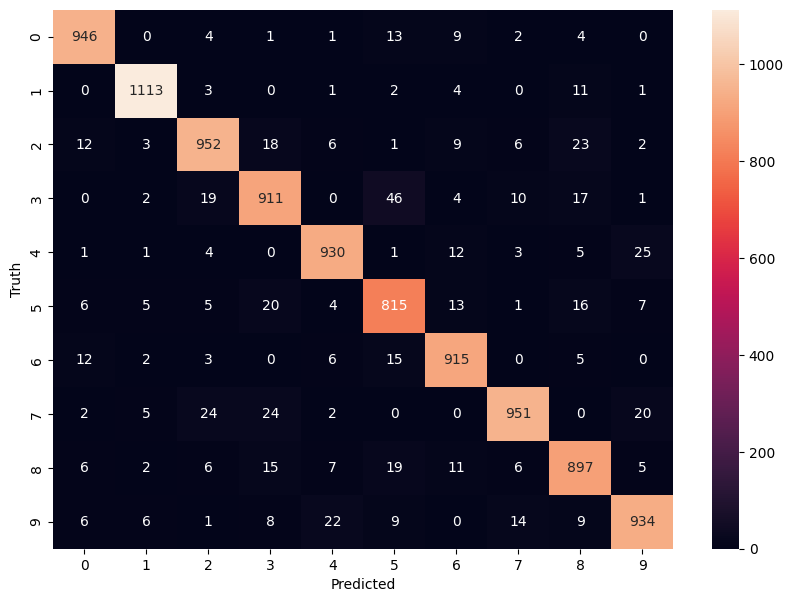

In [65]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')  #use from seaborn import sns, create the heatmap, annot is we see our value, letter d in python standfor desmore,
plt.xlabel('Predicted')
plt.ylabel('Truth')


# predict 0 as 0 have predicted 961 times 
#predict 左边 0 as 下面 2 predict 中间 1 time

In [66]:
errors = (y_predicted_labels - y_test !=0 )  #is is 0 means not errors, if is not 0 it means there is errors
errors

array([False, False, False, ..., False, False, False])

In [67]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes) #only 731 failed in 10000, we got a great score

636

# Check a few random predictions

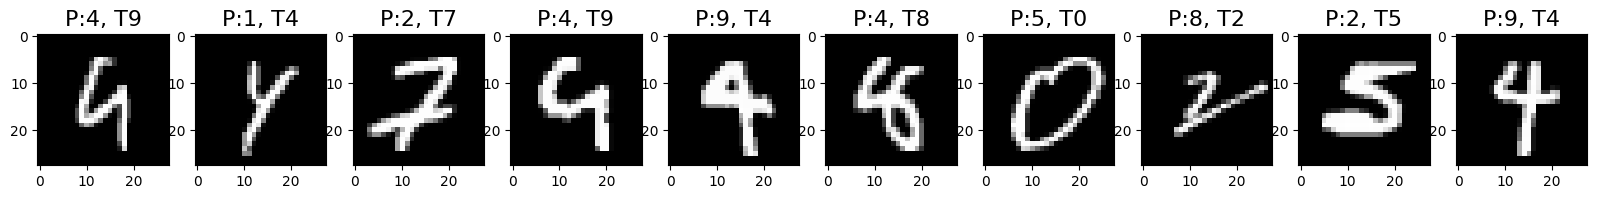

In [68]:
import random

idx_to_check = [y_error_indexes[random.randint(0,len(y_error_indexes)-1)] for _ in range(10)]
#idx_to_check 10 randomly list y_error_index, we repeating the process 10 times, using this randint, this random is chosen all the possible index, choose 10 randomly all of them 

num_classes = 10 

_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i, idx in enumerate(idx_to_check):
    sample = X_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P:{predicted_value}, T{true_value}', fontsize=16)  
    